# **Multi Linear Regression(MLR) Assignment**

# **Assignment 5(b)**

# ***2.Toyota Corolla DataSet(ToyotaCorolla.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
toco=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:
toco

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# **Exploratory Data Analysis**

In [4]:
toco.shape

(1436, 38)

In [5]:
#checking missing values
toco.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
(toco.isna().sum())/len(toco)*100

Id                  0.0
Model               0.0
Price               0.0
Age_08_04           0.0
Mfg_Month           0.0
Mfg_Year            0.0
KM                  0.0
Fuel_Type           0.0
HP                  0.0
Met_Color           0.0
Color               0.0
Automatic           0.0
cc                  0.0
Doors               0.0
Cylinders           0.0
Gears               0.0
Quarterly_Tax       0.0
Weight              0.0
Mfr_Guarantee       0.0
BOVAG_Guarantee     0.0
Guarantee_Period    0.0
ABS                 0.0
Airbag_1            0.0
Airbag_2            0.0
Airco               0.0
Automatic_airco     0.0
Boardcomputer       0.0
CD_Player           0.0
Central_Lock        0.0
Powered_Windows     0.0
Power_Steering      0.0
Radio               0.0
Mistlamps           0.0
Sport_Model         0.0
Backseat_Divider    0.0
Metallic_Rim        0.0
Radio_cassette      0.0
Tow_Bar             0.0
dtype: float64

In [7]:
#checking duplicates
toco.duplicated().sum()

0

In [8]:
toco[toco.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [9]:
#checking datatypes
toco.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [10]:
toco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [11]:
toco.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
toco.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [13]:
toco2=pd.concat([toco.iloc[:,2:4],toco.iloc[:,6:7],toco.iloc[:,8:9],toco.iloc[:,12:14],toco.iloc[:,15:18]],axis=1)

In [14]:
toco2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [15]:
#price is dependent feature

In [16]:
toco3=toco2.rename(columns={'Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'quartax','Weight':'weight'})

In [17]:
toco3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Price    1436 non-null   int64
 1   age      1436 non-null   int64
 2   km       1436 non-null   int64
 3   hp       1436 non-null   int64
 4   cc       1436 non-null   int64
 5   doors    1436 non-null   int64
 6   gears    1436 non-null   int64
 7   quartax  1436 non-null   int64
 8   weight   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [18]:
toco3.duplicated().sum()

1

In [19]:
toco3[toco3.duplicated()]

,Price,age,km,hp,cc,doors,gears,quartax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [20]:
toco3.drop_duplicates(inplace=True)

In [21]:
toco3.reset_index(inplace=True)

In [22]:
toco3

,index,Price,age,km,hp,cc,doors,gears,quartax,weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [23]:
toco3.drop('index',axis=1,inplace=True)

In [24]:
toco3

,Price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [25]:
toco3.duplicated().sum()

0

In [26]:
toco3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Price    1435 non-null   int64
 1   age      1435 non-null   int64
 2   km       1435 non-null   int64
 3   hp       1435 non-null   int64
 4   cc       1435 non-null   int64
 5   doors    1435 non-null   int64
 6   gears    1435 non-null   int64
 7   quartax  1435 non-null   int64
 8   weight   1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [27]:
toco3.describe()

,Price,age,km,hp,cc,doors,gears,quartax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# **Correlation**

In [28]:
#correlation
toco3.corr()

,Price,age,km,hp,cc,doors,gears,quartax,weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
quartax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# **Visualization**

# **PairPlot**

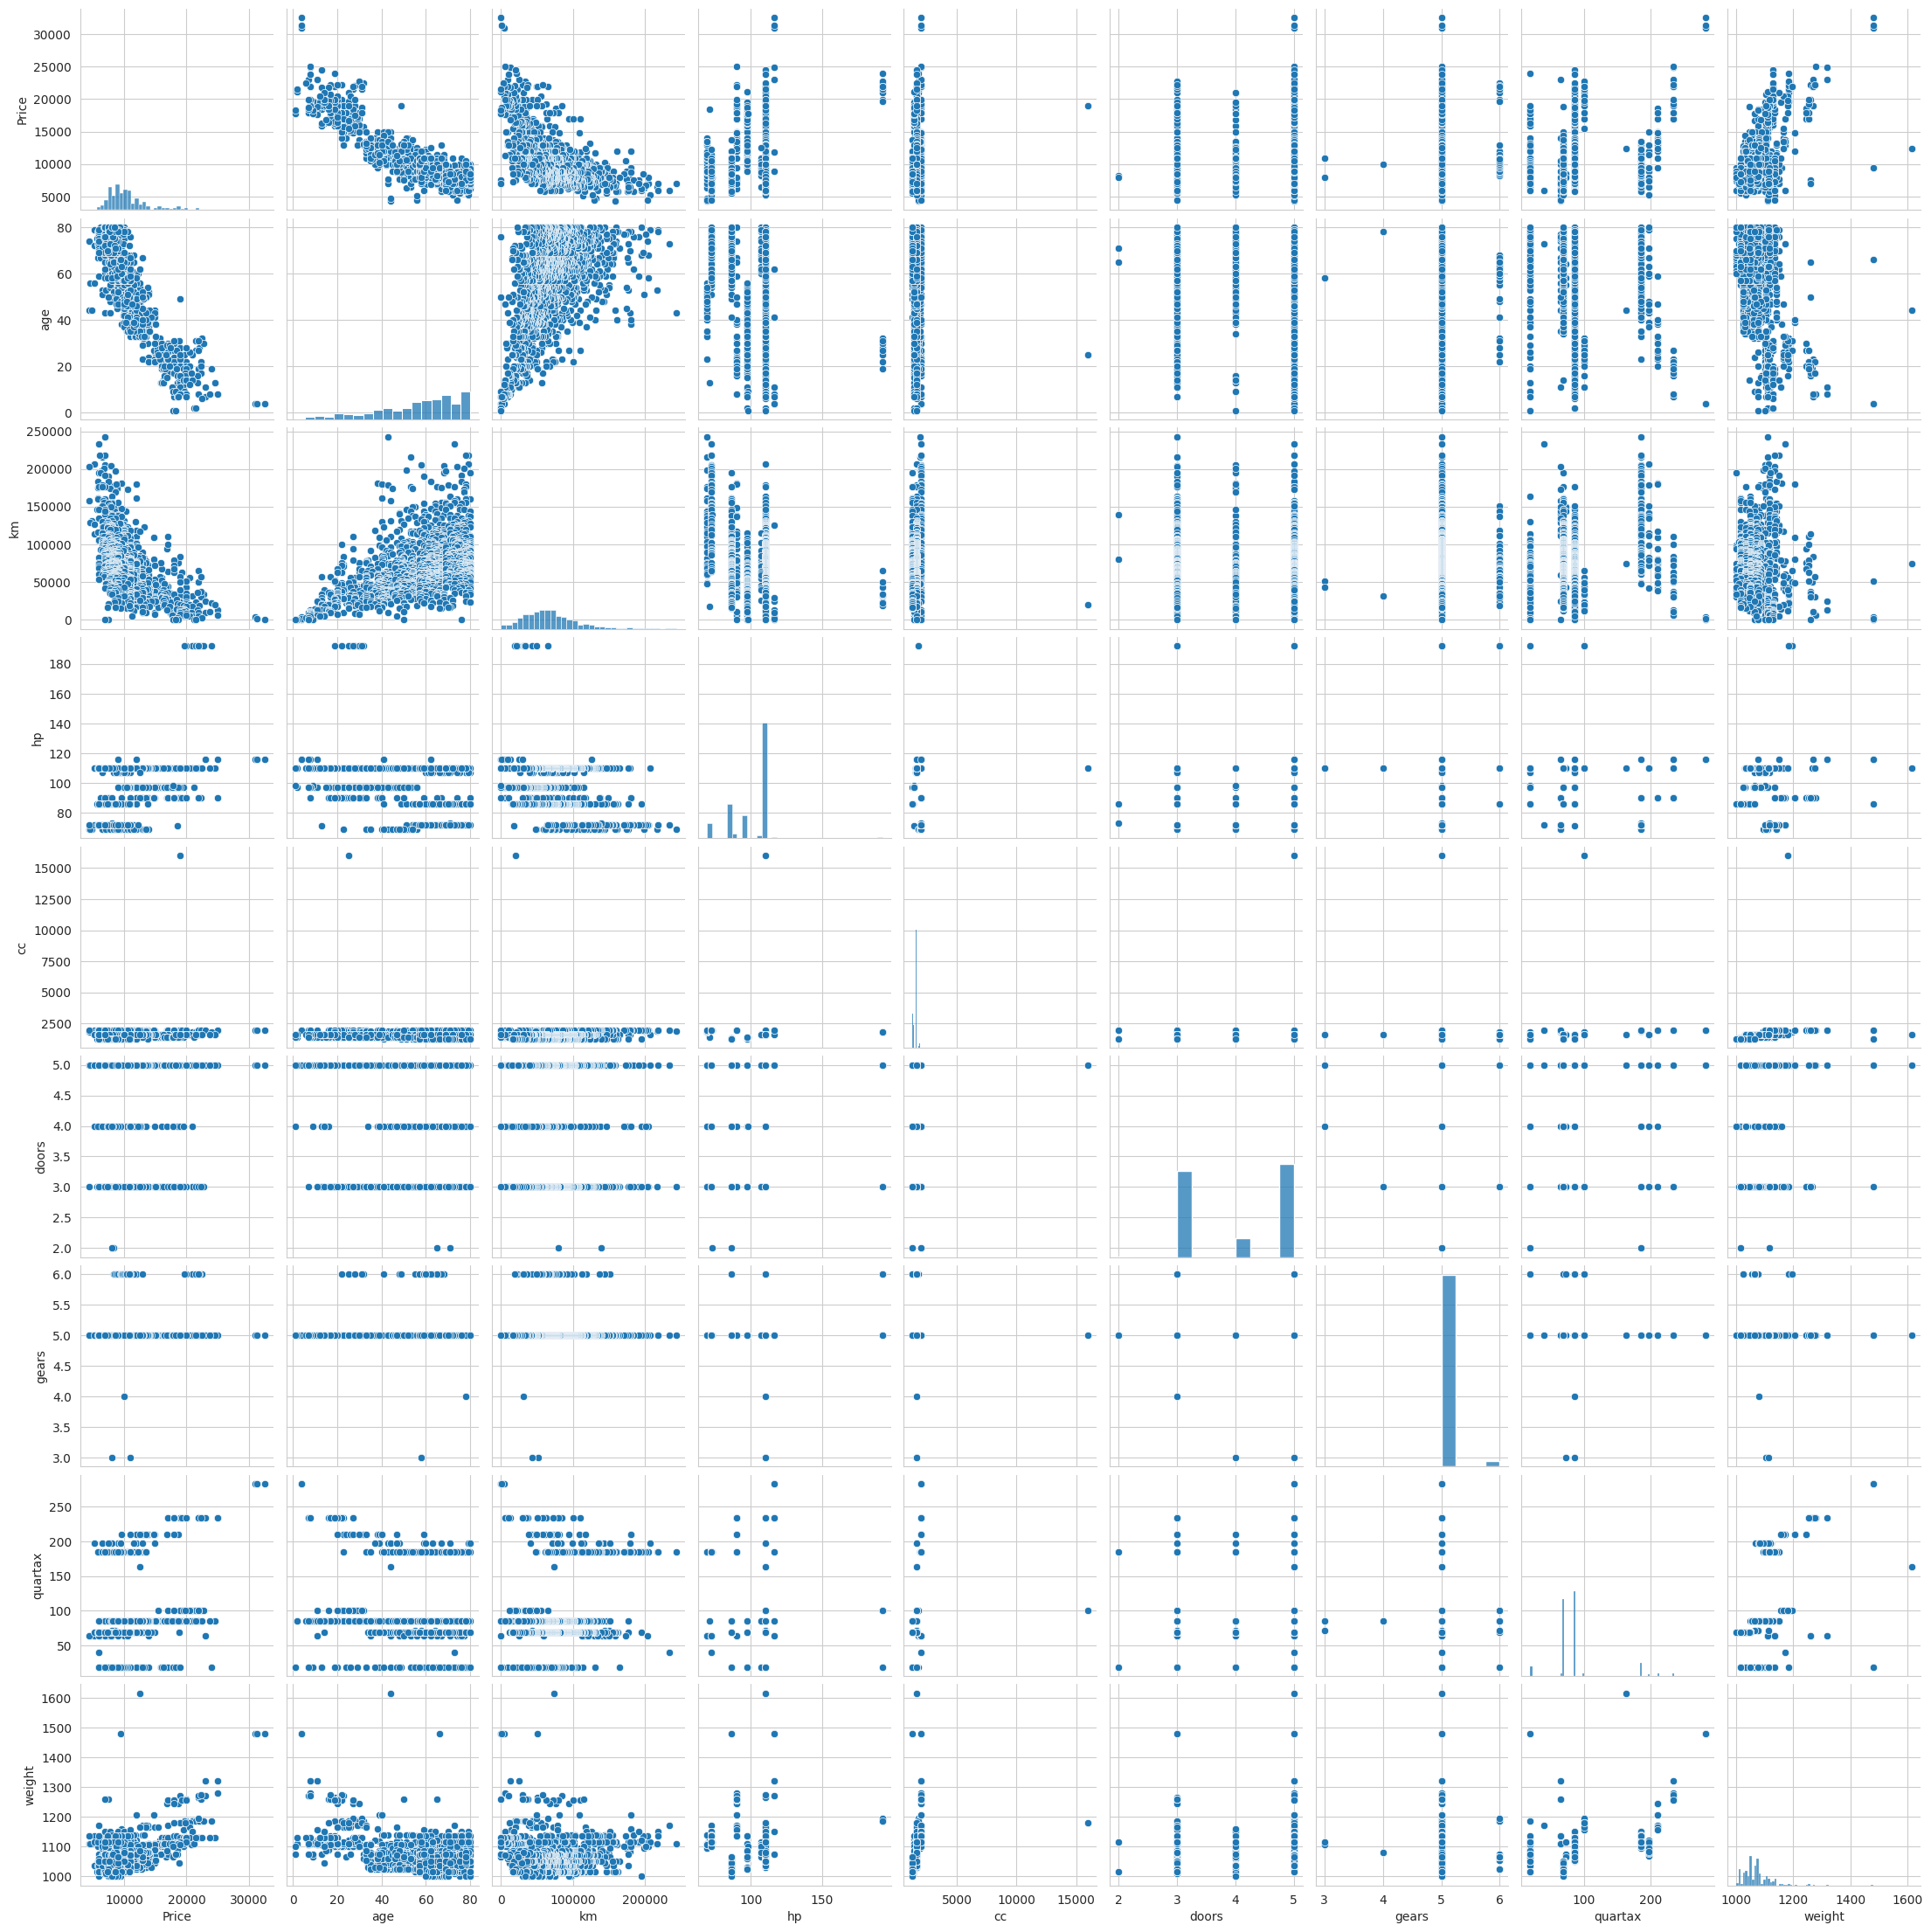

In [29]:
#pairplot
sns.set_style(style='whitegrid')
sns.pairplot(toco3)

# **HeatMap**

<Axes: >

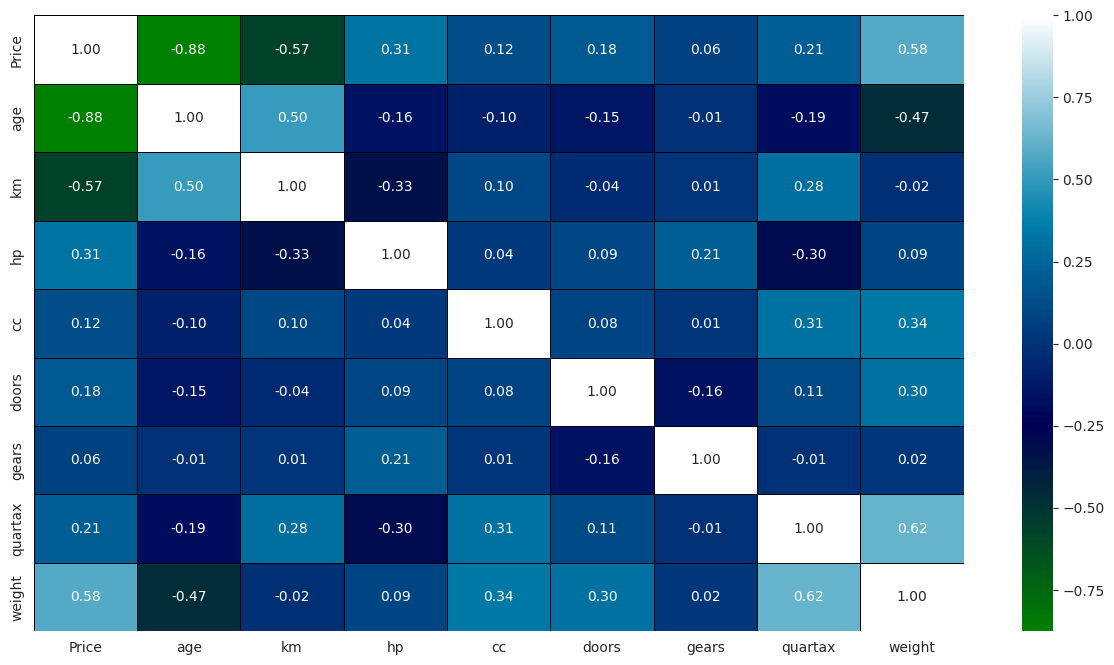

In [30]:
#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(toco3.corr(),annot=True,cmap='ocean',linewidth=0.5,linecolor='black',fmt='.2f')

# **Histogram**

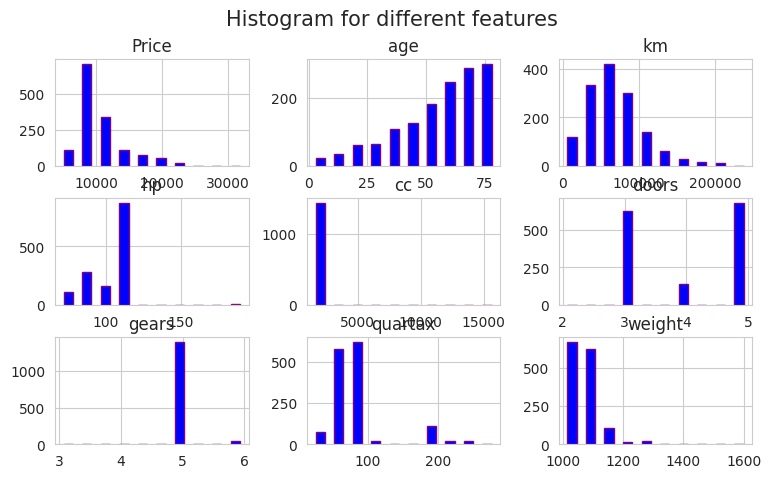

In [31]:
#histogram
toco3.hist(figsize=(9,5),color='blue',rwidth=0.5,edgecolor='purple')
plt.suptitle('Histogram for different features',ha='center',fontsize=15)
plt.show()

# **Distplot**

<Axes: xlabel='Price', ylabel='Density'>

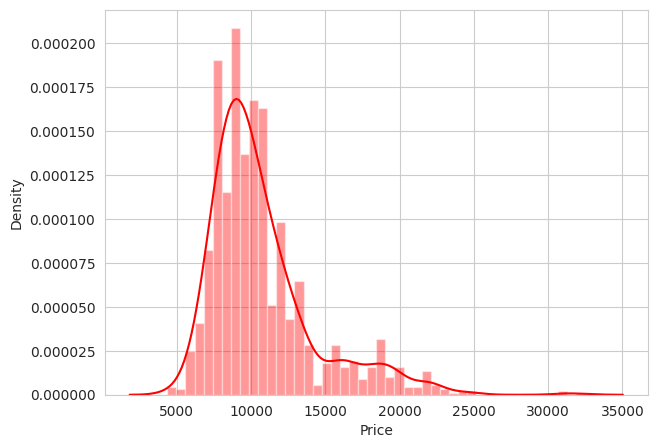

In [32]:
#distplot
plt.figure(figsize=(7,5))
sns.distplot(toco3['Price'],color='red')

<Axes: xlabel='Price', ylabel='Density'>

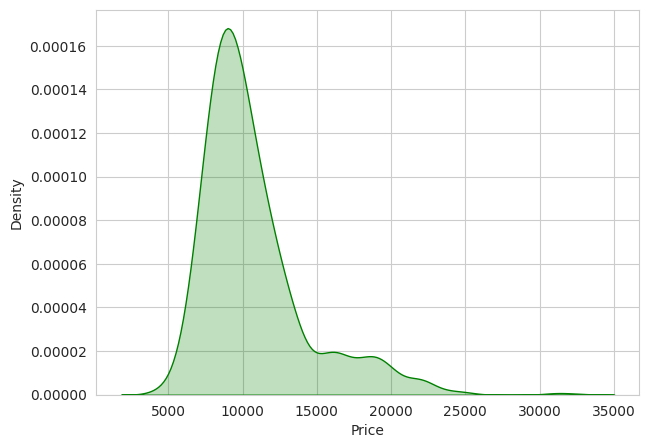

In [33]:
#kde plot
plt.figure(figsize=(7,5))
sns.kdeplot(toco3['Price'],color='green',shade=True)

# **Regressionplot**

<Axes: xlabel='Price', ylabel='age'>

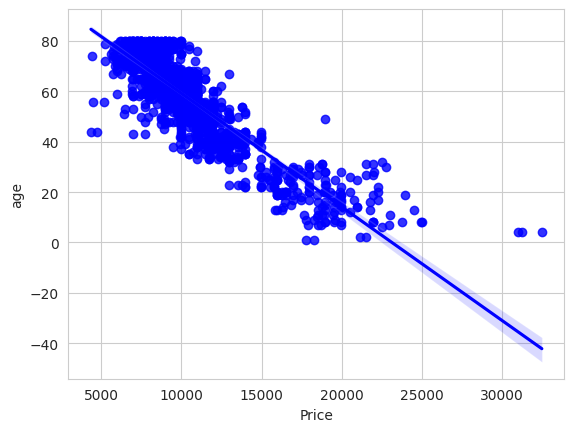

In [34]:
#regressionplot
sns.regplot(x='Price',y='age',data=toco3,color='blue')

<Axes: xlabel='Price', ylabel='age'>

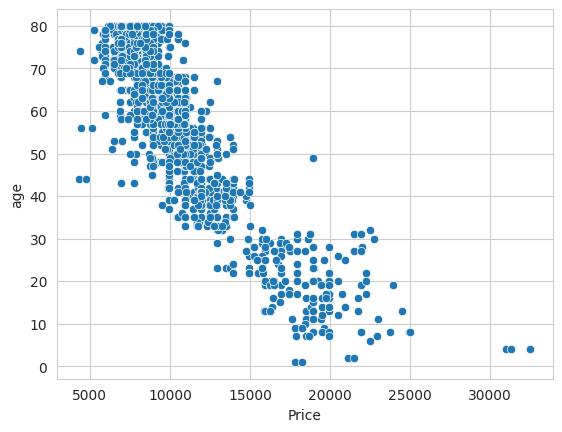

In [35]:
#scatterplot
sns.scatterplot(x='Price',y='age',data=toco3)

# **Boxplot**

<Axes: >

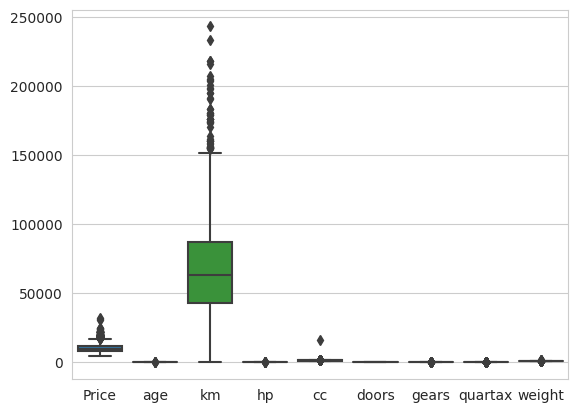

In [36]:
#boxplot
sns.boxplot(toco3)

In [37]:
#outliers are present...

# **Model Building**

In [38]:
# BUILDING THE MODELS..

In [39]:
toco3.columns

Index(['Price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'quartax',
       'weight'],
      dtype='object')

In [40]:
#building with considering all features
model=smf.ols('Price~age+km+hp+cc+doors+gears+quartax+weight',data=toco3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:27:38   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
quartax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#cc and doors are have more p value it should be less 0.05
#so slr is performed on cc and doors

In [42]:
#slr of cc

In [43]:
#slr of cc
mcc=smf.ols('Price~cc',data=toco3).fit()
mcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.29e-06
Time:                        15:27:38   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#slr of doors

In [45]:
#slr of doors
mdoors=smf.ols('Price~doors',data=toco3).fit()
mdoors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.40e-12
Time:                        15:27:38   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# slr of combination of cc+doors

In [47]:
# slr of combination of cc+doors
mcd=smf.ols('Price~cc+doors',data=toco3).fit()
mcd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.55e-15
Time:                        15:27:38   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Model Validation**

In [48]:
#collinearity
#VIF

In [49]:
toco3.columns

Index(['Price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'quartax',
       'weight'],
      dtype='object')

In [50]:
#consider 'age' as dependent
ma=smf.ols('age~km+hp+cc+doors+gears+quartax+weight',data=toco3).fit()
rs_ma=ma.rsquared
vif_ma=1/(1-rs_ma)
vif_ma

1.8762358497682892

In [51]:
#consider 'km' as dependent
mk=smf.ols('km~age+hp+cc+doors+gears+quartax+weight',data=toco3).fit()
rs_mk=mk.rsquared
vif_mk=1/(1-rs_mk)
vif_mk

1.75717802398104

In [52]:
#consider 'hp' as dependent
mh=smf.ols('hp~age+km+cc+doors+gears+quartax+weight',data=toco3).fit()
rs_mh=mh.rsquared
vif_mh=1/(1-rs_mh)
vif_mh

1.4191801087182137

In [53]:
#consider 'cc' as dependent
mc=smf.ols('cc~age+km+hp+doors+gears+quartax+weight',data=toco3).fit()
rs_mc=mc.rsquared
vif_mc=1/(1-rs_mc)
vif_mc

1.1634703645940856

In [54]:
#consider 'door' as dependent
md=smf.ols('doors~age+km+hp+cc+gears+quartax+weight',data=toco3).fit()
rs_md=md.rsquared
vif_md=1/(1-rs_md)
vif_md

1.1558898658142076

In [55]:
#consider 'gears' as dependent
mg=smf.ols('gears~age+km+hp+cc+doors+quartax+weight',data=toco3).fit()
rs_mg=mg.rsquared
vif_mg=1/(1-rs_mg)
vif_mg

1.0988429081631148

In [56]:
#consider 'quartax' as dependent
mq=smf.ols('quartax~age+km+hp+cc+doors+gears+weight',data=toco3).fit()
rs_mq=mq.rsquared
vif_mq=1/(1-rs_mq)
vif_mq


2.295374508985715

In [57]:
#consider 'weight' as dependent
mw=smf.ols('weight~age+km+hp+cc+doors+gears+quartax',data=toco3).fit()
rs_mw=mw.rsquared
vif_mw=1/(1-rs_mw)
vif_mw

2.4871800071791856

In [58]:
toco3.columns

Index(['Price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'quartax',
       'weight'],
      dtype='object')

In [59]:
#dataframe for all VIF
dt={'Variables':['Age','KM','HP','CC','Doors','Gears','Quartax','weight'],
                'VIF':[vif_ma,vif_mk,vif_mh,vif_mc,vif_md,vif_mg,vif_mq,vif_mw]}
vif_dt=pd.DataFrame(dt)
vif_dt

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quartax,2.295375
7,weight,2.487180


In [60]:
# as all features p < 0.05 .So no collinearity or multicollinearity is present.So consider all features in the equation

In [61]:
model=smf.ols('Price~age+km+hp+cc+doors+gears+quartax+weight',data=toco3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:27:39   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
quartax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#test for normality

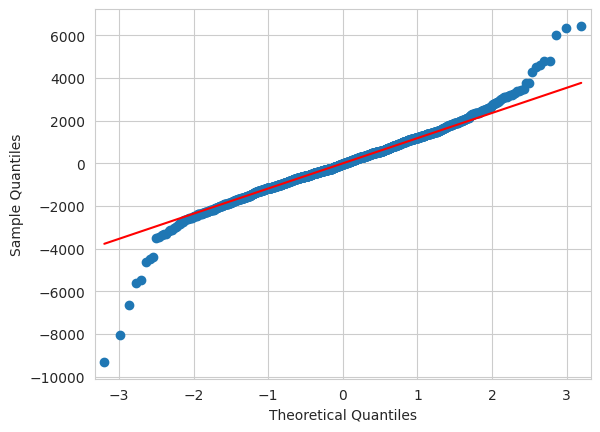

In [63]:
#qqplot
sm.qqplot(model.resid,line='q')
plt.show()

In [64]:
#standardize values
def standardize(v):
  equ=(v-v.mean())/v.std()
  return equ

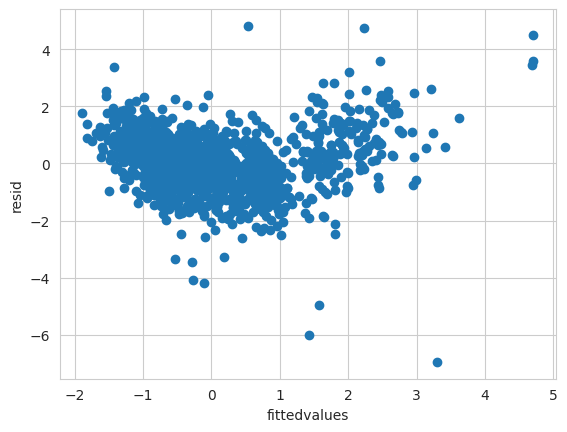

In [65]:
#scatterplot
plt.scatter(x=standardize(model.fittedvalues),y=standardize(model.resid))
plt.xlabel('fittedvalues')
plt.ylabel('resid')
plt.show()

# **residual vs regressors**

In [66]:
#residual vs regressors

In [67]:
toco3.columns

Index(['Price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'quartax',
       'weight'],
      dtype='object')

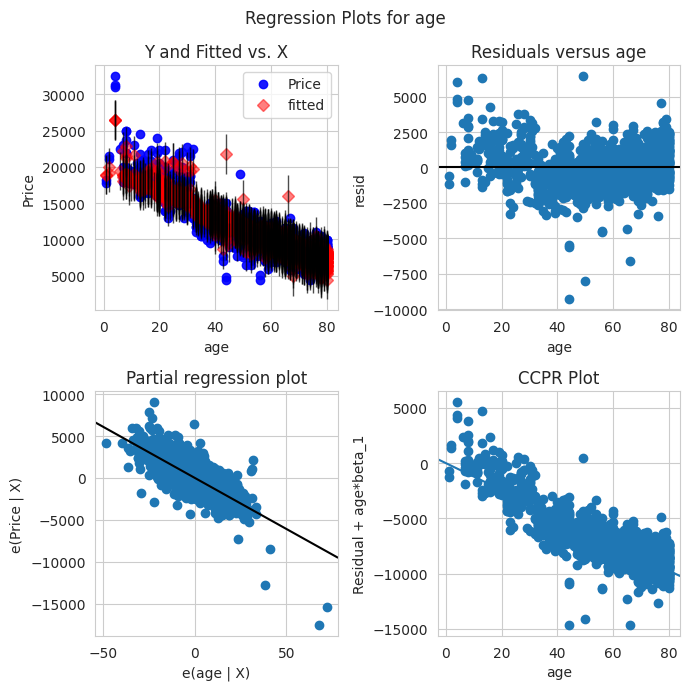

In [68]:
#plot for age
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'age',fig)
plt.show()

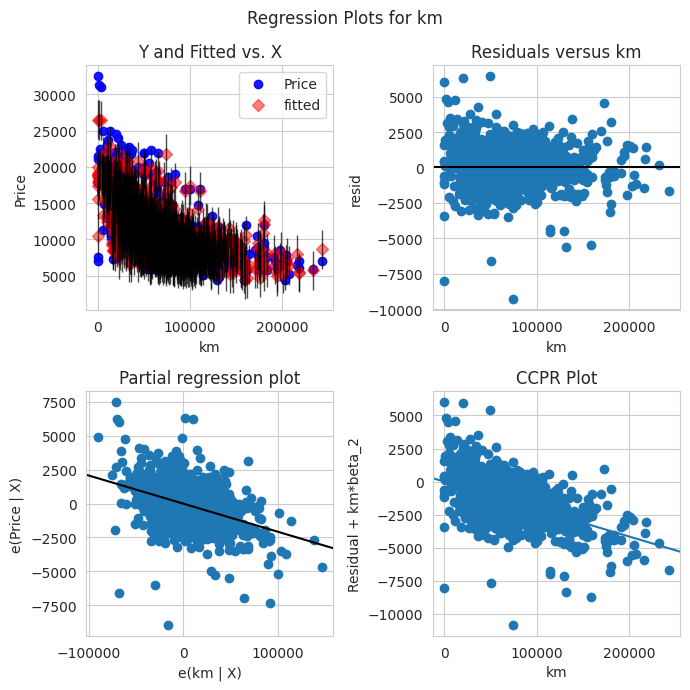

In [69]:
#plot for km
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'km',fig)
plt.show()

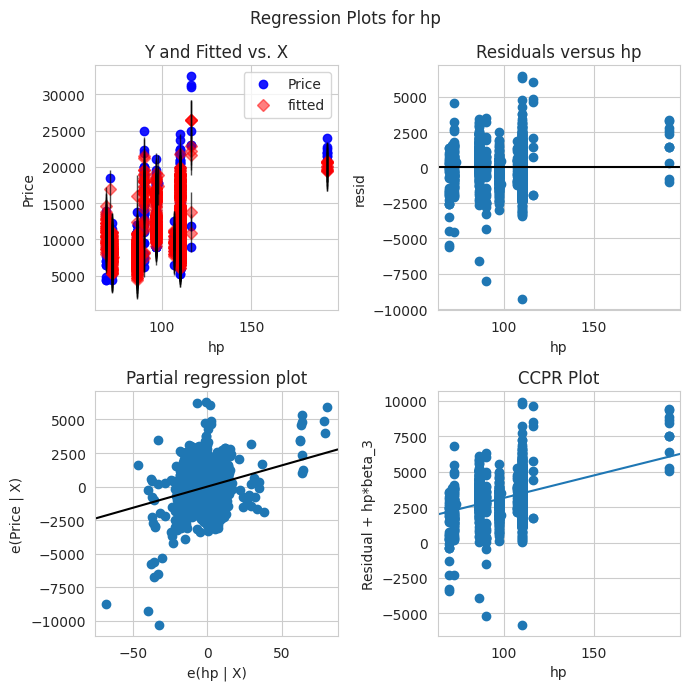

In [70]:
#plot for hp
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'hp',fig)
plt.show()

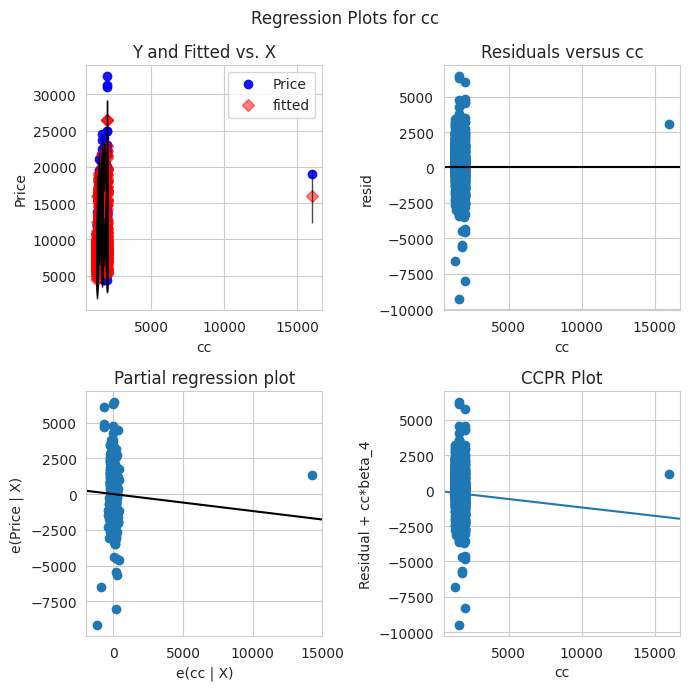

In [71]:
#plot for cc
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'cc',fig)
plt.show()

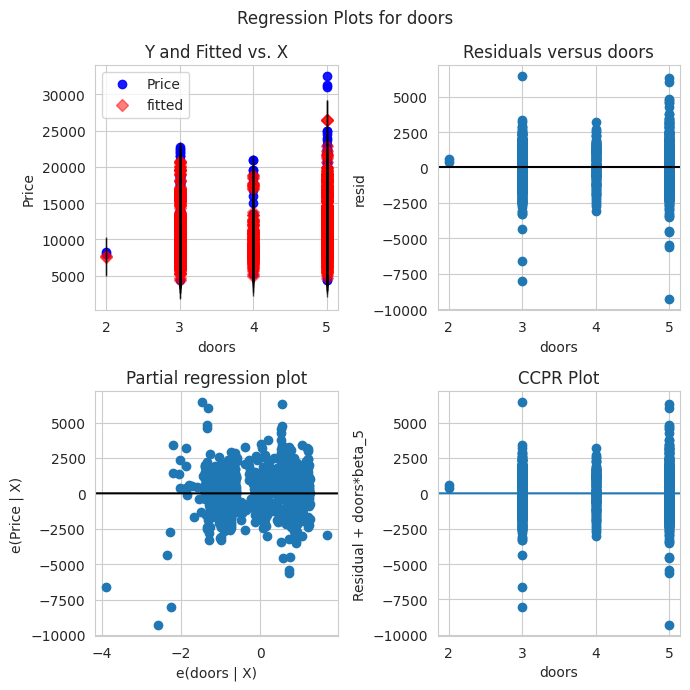

In [72]:
#plot for doors
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'doors',fig)
plt.show()

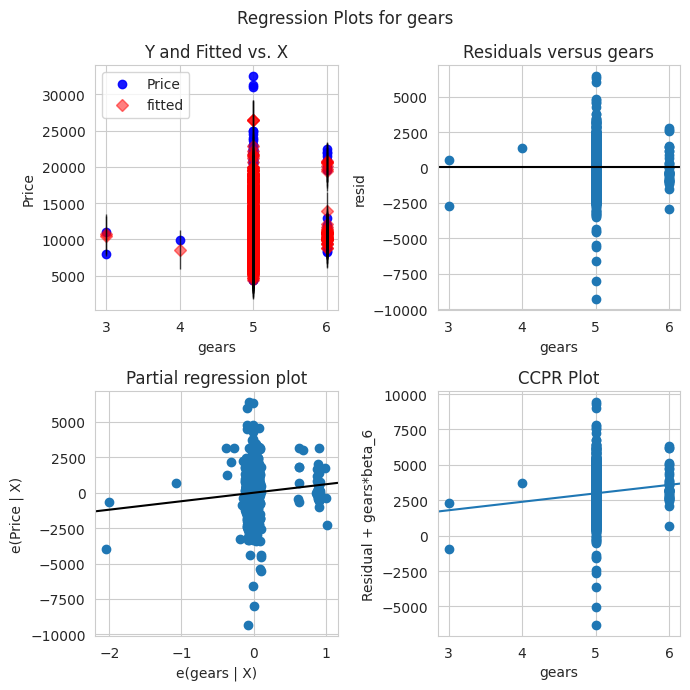

In [73]:
#plot for gears
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'gears',fig)
plt.show()

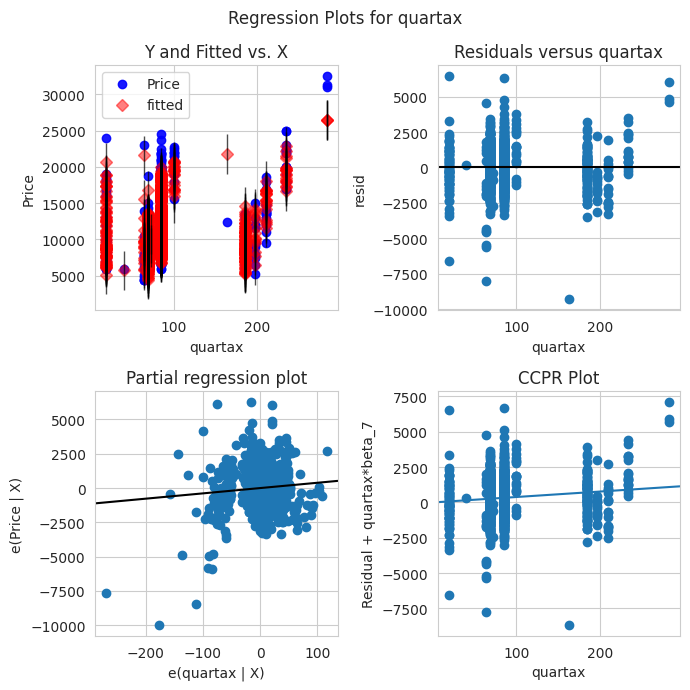

In [74]:
#plot for quartax
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'quartax',fig)
plt.show()

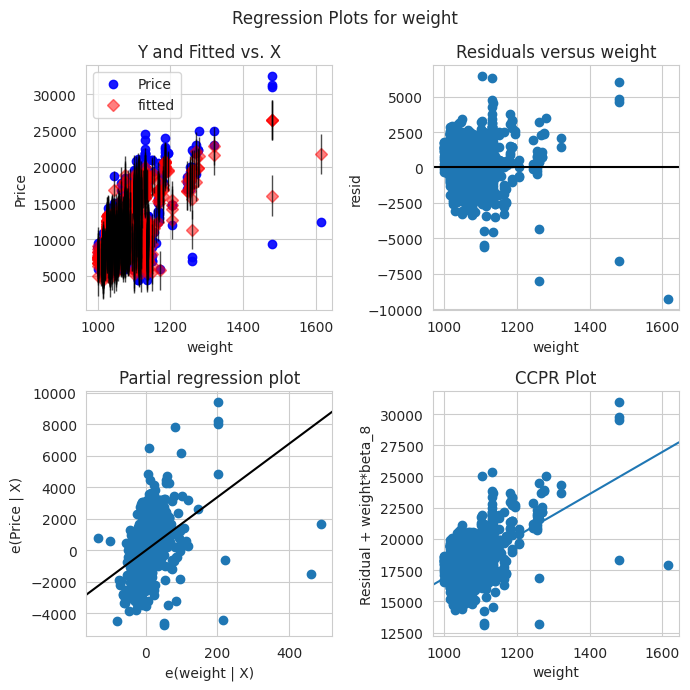

In [75]:
#plot for weight
fig=plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(model,'weight',fig)
plt.show()

In [76]:
#model detection
#detecting influencer and outliers

In [77]:
#leverage point

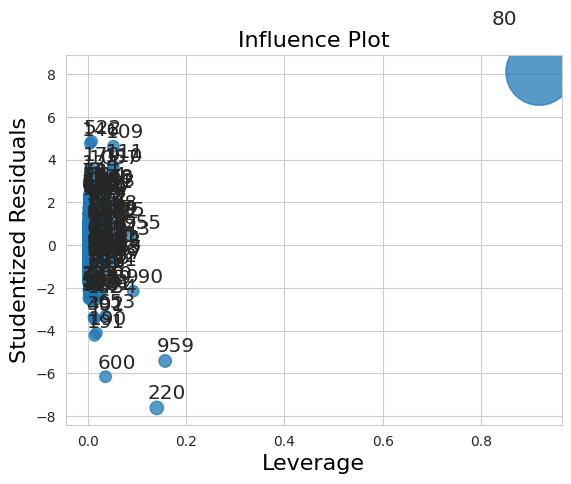

In [78]:
#influence plot
influence_plot(model)
plt.show()

In [79]:
k=toco3.shape[1]
n=toco3.shape[0]
leverage_cutoffs=3*((k+1)/n)
leverage_cutoffs

0.020905923344947737

# **cooks distance**

In [80]:
#cooks distance

In [81]:
mfv=model.get_influence()
(c,_)=mfv.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

Text(0, 0.5, 'Cook distance')

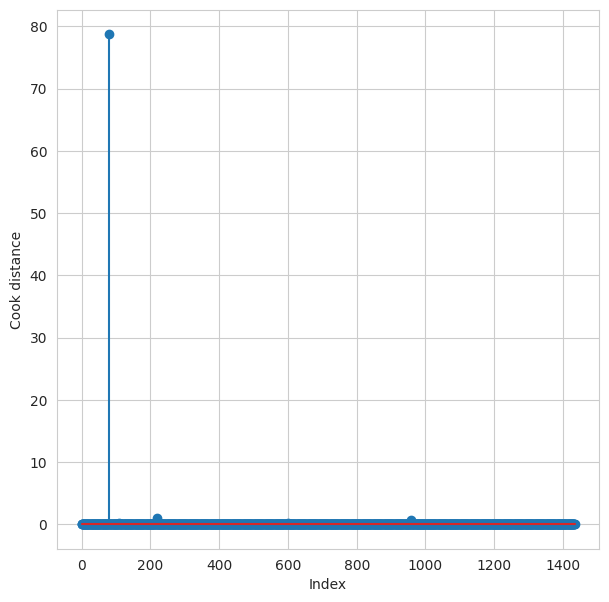

In [82]:
plt.figure(figsize=(7,7))
plt.stem(np.arange(len(toco3)),np.round(c,3))
plt.xlabel('Index')
plt.ylabel('Cook distance')

In [83]:
(np.argmax(c),np.max(c))

(80, 78.72950582258932)

In [84]:
#drop 80th row

In [85]:
toco3[toco3.index.isin([80])]

,Price,age,km,hp,cc,doors,gears,quartax,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [86]:
toco4=toco3.drop(toco3.index[80],axis=0)

In [87]:
toco4

,Price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [88]:
len(toco3)

1435

In [89]:
len(toco4)

1434

In [90]:
toco4.reset_index(inplace=True)

In [91]:
toco4.drop('index',axis=1,inplace=True)

In [92]:
toco4

,Price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [93]:
#checking again

In [94]:
mm2=smf.ols('Price~age+km+hp+cc+doors+gears+quartax+weight',data=toco4).fit()
mfv2=mm2.get_influence()
(c,_)=mfv2.cooks_distance
c

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

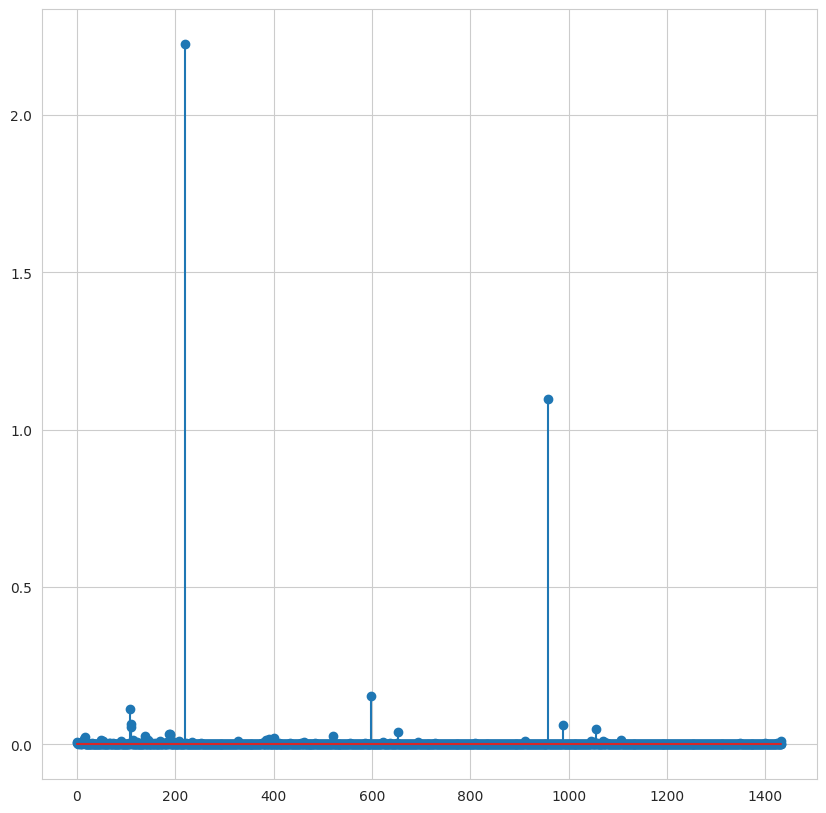

In [95]:
plt.figure(figsize=(10,10))
plt.stem(np.arange(len(toco4)),np.round(c,3))
plt.show()

In [96]:
(np.argmax(c),np.max(c))

(219, 2.225351365527102)

In [97]:
# since no outliers are present and c is minimum.So we can stop model detection diagnostics.

# **Final Model**

In [98]:
#model prediction

In [99]:
finalmodel=smf.ols('Price~age+km+hp+cc+doors+gears+quartax+weight',data=toco4).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:27:56   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
km            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
hp            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
gears        527.1292    192.832      2.734      0.006     148.864     905.395
quartax        8.9414      1.427      6.268      0.000       6.143      11.740
weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
toco4.tail()

,Price,age,km,hp,cc,doors,gears,quartax,weight
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015
1433,6950,76,1,110,1600,5,5,19,1114


In [101]:
#new data
new=pd.DataFrame({'age':75,'km':17114,'hp':89,'cc':1325,'doors':4,'gears':5,'quartax':70,'weight':1105},index=[0])
new

,age,km,hp,cc,doors,gears,quartax,weight
0,75,17114,89,1325,4,5,70,1105


In [102]:
#predict of price
finalmodel.predict(new)

0    9951.01834
dtype: float64

In [103]:
finalmodel.predict(toco4).head() #predicted value

0    16513.565909
1    16051.656226
2    16486.949796
3    16133.995128
4    15921.372341
dtype: float64

In [104]:
finalmodel.fittedvalues.head() #predicted value

0    16513.565909
1    16051.656226
2    16486.949796
3    16133.995128
4    15921.372341
dtype: float64

In [105]:
toco4['Price'].head() #actual value

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [106]:
finalmodel.resid.head() #error

0   -3013.565909
1   -2301.656226
2   -2536.949796
3   -1183.995128
4   -2171.372341
dtype: float64

In [107]:
##completed...........

# **Completed**